In [17]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel
%matplotlib inline

In [18]:
training_folder = '../../'

In [19]:
route_model = stepmodel.read_zip(training_folder + r'model/preparation/networkcasted.zip')
road = stepmodel.read_zip(training_folder + 'model/preparation/road.zip')
base = stepmodel.read_zip(training_folder + r'model/preparation/base.zip')
base = base.change_epsg(epsg=32619, coordinates_unit='meter')

sm = base.copy()

sm.links = route_model.links
sm.nodes = route_model.nodes

sm.road_links = road.road_links
sm.road_nodes = road.road_nodes

Reprojecting model from epsg 4326 to epsg 32619: 100%|█████████████████████████████████| 33/33 [00:04<00:00,  8.12it/s]


In [20]:
disaggregated = sm.copy()

# clustering

In [21]:
if False:
    sm = disaggregated.copy()
    sm.preparation_clusterize_nodes(1000)

In [22]:
sm.integrity_fix_circular_lines()

# walkmodel

In [23]:
sm.preparation_footpaths(max_length=800)

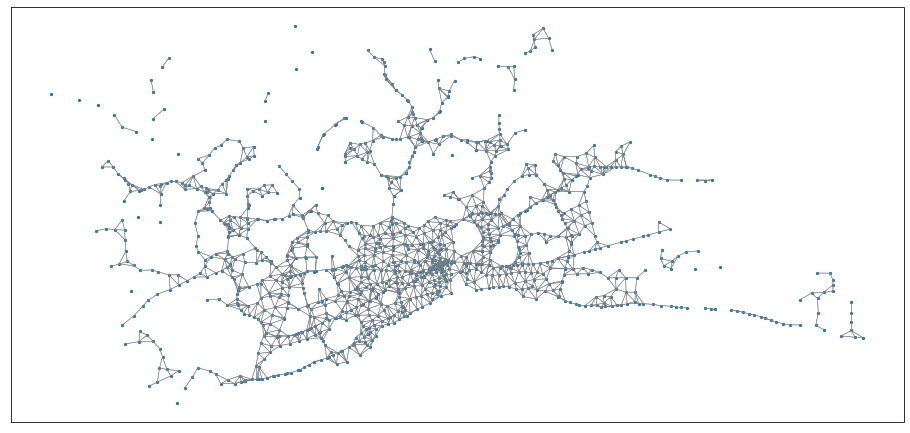

In [24]:
plot = sm.plot(
    'footpaths', color='grey', linewidth=0.5,
    ax=sm.plot('nodes', markersize=5, figsize=[16, 9] )
)

In [25]:
threshold = 200
sm.preparation_ntlegs(
    n_ntlegs=10,
    short_leg_speed=3,
    long_leg_speed=10,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True
)

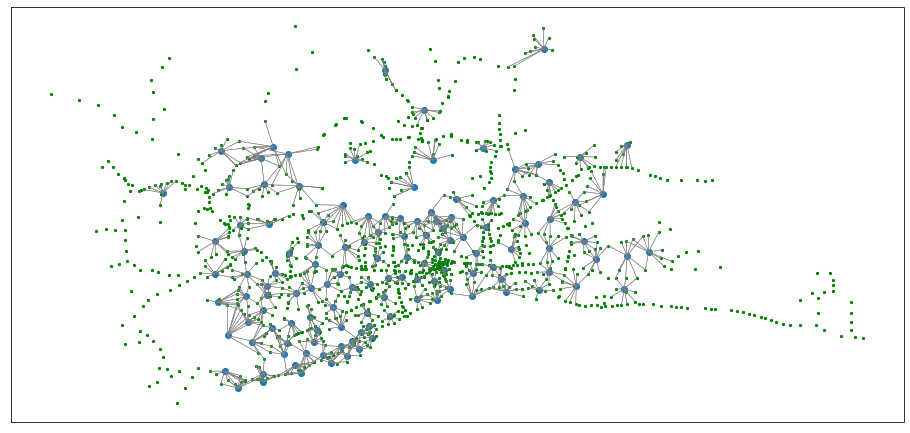

In [26]:
plot = sm.plot(
    'zone_to_transit', color='grey', linewidth=0.5,
    ax=sm.plot('nodes', color='green', markersize=5,
        ax=sm.plot('centroids', figsize=[16, 9])
    )
)

In [27]:
sm.to_zip(training_folder + 'model/preparation/walkmodel.zip')  

jsons: 100%|███████████████████████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.55it/s]


# GIS

In [28]:
projected = sm.change_epsg(epsg=4326, coordinates_unit='degree')
projected.to_json(
    training_folder + 'model/latest', 
 
)  

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 34/34 [01:35<00:00,  2.82s/it]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes
could not save geometry from table mode_nests
could not save geometry from table logit_scales
could not save geometry from table utility_values


# zone_to_transit monitoring

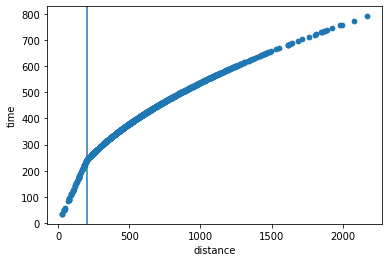

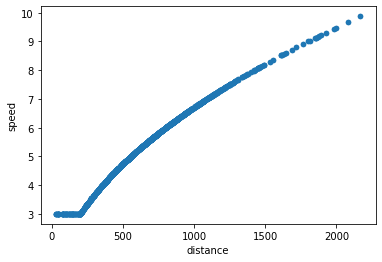

In [29]:
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time')
ax.axvline(x=threshold)
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed')